<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/MReg_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariable linear regression

Multivariate Linear Regression is a statistical modeling technique used to analyze the relationship between multiple independent variables (also called predictors or features) and a single dependent variable. It extends the concept of simple linear regression, which deals with only one independent variable.

In multivariate linear regression, the goal is to find the best-fitting linear equation that represents the relationship between the independent variables and the dependent variable. The equation can be expressed as:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \epsilon$

where:
- $y$ is the dependent variable.
- $\beta_0$ is the y-intercept or the constant term.
- $x_1, x_2, \ldots, x_p$ are the independent variables.
- $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients (regression weights) representing the effect of each independent variable on the dependent variable.
- $\epsilon$ is the error term or residual, which represents the unexplained variation in the dependent variable.

The coefficients $\beta_0, \beta_1, \ldots, \beta_p$ are estimated using a method called Ordinary Least Squares (OLS). The goal of OLS is to minimize the sum of squared residuals, which is the difference between the actual dependent variable values and the predicted values based on the linear equation.

The estimation of the coefficients involves solving a set of equations that minimize the sum of squared residuals. This can be done using matrix algebra techniques, such as the normal equation or matrix inversion.

To assess the overall fit of the multivariate linear regression model, various statistical measures can be used, including the coefficient of determination (R-squared), adjusted R-squared, F-statistic, and p-values associated with the coefficients. These measures help determine the proportion of the dependent variable's variability explained by the model and the statistical significance of the independent variables.

### Normal equations and the Ordinary Least Squares (OLS)
Linear regression can be related to the normal equations, which provide a closed-form solution for finding the optimal values of the regression coefficients. The normal equations are derived from the principle of minimizing the sum of squared residuals (also known as the Ordinary Least Squares method).

Let's consider the case of simple linear regression with one predictor variable. The relationship between the predictor variable ($x$) and the response variable ($y$) can be represented by the equation:
$
 y = \beta_0 + \beta_1x + \epsilon
$

where $\beta_0$ is the intercept, $\beta_1$ is the slope coefficient, and $\epsilon$ is the error term.

The goal of linear regression is to estimate the values of $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals:

$ \text{minimize} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2 $

To find the optimal values of $\beta_0$ and $\beta_1$, we differentiate the sum of squared residuals with respect to each coefficient and set the derivatives equal to zero. This leads to the normal equations:

$ \sum_{i=1}^{n} y_i = n\beta_0 + \beta_1\sum_{i=1}^{n} x_i $

$ \sum_{i=1}^{n} x_iy_i = \beta_0\sum_{i=1}^{n} x_i + \beta_1\sum_{i=1}^{n} x_i^2 $

These equations represent a system of linear equations that can be solved to obtain the estimates of $\beta_0$ and $\beta_1$.

For multiple linear regression with $K$ predictor variables, the normal equations can be extended to a matrix form:

$ \mathbf{X}^T\mathbf{X}\mathbf{b} = \mathbf{X}^T\mathbf{y} $

where $\mathbf{X}$ is the design matrix containing the predictor variables, $\mathbf{y}$ is the response variable vector, and $\mathbf{b}$ is the coefficient vector to be estimated.

By solving the normal equations, we can obtain the estimates of the regression coefficients, which represent the best-fitting line or hyperplane that minimizes the sum of squared residuals.

The normal equations provide a closed-form solution for linear regression, but in practice, other methods such as gradient descent or matrix factorization techniques may be used for computational efficiency or when dealing with large datasets.





# Using python for OLS

Besides numpy and matplotlib, we will use the [statmodels](https://www.statsmodels.org/stable/index.html) library to perform the regression and [itertools](https://docs.python.org/3/library/itertools.html) to generate a dataset.



In [ ]:
# import libraries
import statsmodels.api as sm
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt

# Generate a set of predictor variables
span = np.linspace(0, 10, 10)
x=list(iter.combinations_with_replacement(span,2))   # combinations_with_replacement('ABCD', 2) AA AB AC AD BB BC BD CC CD DD
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,1]**2 + np.random.randn(len(x[:,1])) * 3

x = sm.add_constant(x)
# Perform least square fit
est = sm.OLS(y,x).fit(intercept=True)
print(est.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     331.6
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           2.51e-30
Time:                        18:52:22   Log-Likelihood:                -137.00
No. Observations:                  55   AIC:                             280.0
Df Residuals:                      52   BIC:                             286.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5672      1.072     -2.395      0.0

**Dependent variable:** Dependent variable is one that is going to depend on other variables. In this regression analysis Y is our dependent variable because we want to analyse the effect of X on Y.

**Model:** The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑e$_i^2$ ).

**Number of observations:** The number of observation is the size of our sample, i.e. N = 55.

**Degree of freedom(df) of residuals:**
Degree of freedom is the number of independent observations on the basis of which the sum of squares is calculated.

Df Residuals = 55 - (1+1) = 53

Degree of freedom (Df) is calculated as, Degrees of freedom,  Df  = N - K

Where, N = sample size(no. of observations) and  K = number of variables + 1

Df of model:
Df of model = K - 1 = 2 - 1 = 1 , where K = number of variables + 1


**Constant term:** The constant term is the intercept of the regression line ($\beta_0$}. From regression line (eq 1.) the intercept is -1.9344. In regression we omits some independent variables that do not have much impact on the dependent variable, the intercept tells the average value of these omitted variables and noise present in model.

**Coefficient terms:** The coefficient terms are the the same as number of x-values we train on, here $\beta_1$ and $\beta_2$.

**Standard error of parameters:** Standard error is also called the standard deviation. Standard error shows the sampling variability of these parameters. Standard error is calculated by as:

Standard error of intercept (b$_0$):

se(b$_0$)= $\sqrt{\frac{\sum x_i^2}{n \sum (x_i -\bar{x})^2}\sigma^2}$


Standard error of coefficients (b$_1$ and b$_2$):

se(b$_1$) = se(b$_2$) = $\sqrt{\frac{\sigma^2}{n \sum (x_i -\bar{x})}}$

Here, $\sigma^2$ is the Standard error of regression (SER). $\sigma^2$ is equal to RSS (Residual Sum of Square i.e ∑e$_i^2$).

**t-statistics:**
In theory, we assume that error term follows the normal distribution and because of this the parameters b$_0$, b$_1$ and b$_2$ also have normal distributions with variance calculated in above section.

That is,
b$_0$  ∼ N(B$_0$, σ$_{b0}^2$)

b$_1$  ∼ N(B$_1$ , σ$_{b1}^2$)

b$_2$  ∼ N(B$_2$ , σ$_{b2}^2$)

Here B$_0$, B$_1$ and B$_2$ are true means of b$_0$, b$_1$ and b$_2$.

t–statistics are calculated by assuming following hypothesises of the following tpe for each **B**:

**H$_0$: B$_2$ = 0       (variable X has no influence on Y)**

**H$_a$  : B$_2$ ≠ 0      (X has significant impact on Y)**

Calculations for t-statistics :          

t = (b$_0$ - B$_0$)/se(b$_0$)

From the summary table, b$_0$ = -2.5672  and se(b$_0$) = 1.072, So,

                   t = (-2.5672 - 0) / 1.072  = -2.395

Similarly,  b$_1$ = 3.0379 , se(b$_2$) = 0.172

                   t = (3.0379 - 0) /0.172  = 17.675

and,  b$_2$ = 1.2693, se(b$_2$) = 0.172

                   t = (1.2693 - 0) /0.172  = 7.385

**p - values:**
In theory, we read that p-value is the probability of obtaining the t-statistics at least as contradictory to H$_0$ as calculated from assuming that the null hypothesis is true. In the summary table, we can see that P-value for the constant is 0.02, and both coefficient parameters are approximately 0.

If you know about significance levels then you can see that we cannot reject the null hypothesis while with this model.

**Confidence intervals:**
There are many approaches to test the hypothesis, including the p-value approach mentioned above. The confidence interval approach is aonther one. 5% is the standard significance level (∝) at which C.I’s are made.

C.I for B$_1$ is ( b$_1$ - t$_{\alpha/2}$*se(b$_1$), b$_1$ + t$_{\alpha/2}$*se(b$_1$))

Since $\alpha$ = 5 %, b$_1$ = 3.0379, se(b$_1$) = 0.172, from t table, t$_{0.025,148} = 1.655

After putting values the C.I for B$_1$ is approx. (2.693, 3.383). Same can be done for B$_0$ and B$_2$ as well.

While calculating p values we did not reject the null hypothesis, which we can see same in C.I for B$_1$ as well. Since 0 does not lie in any of the intervals, we will reject the null hypothesis.

**R–squared value:**
R$^2$ is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 78.9 % variation in Y can be explained by X. The maximum possible value of R$^2$ can be 1, means the larger the R$^2$ value better the regression.

**Adj. R-squared value**
The Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. It increases only if the new term improves the model more than would be expected by chance. It is a more reliable metric when comparing models with different numbers of predictors.

**F–statistic:**
An F-test tells the goodness of fit of a regression. The test is similar to the t-test or other tests we do for the hypothesis. The F–statistic is calculated as below:                    

F = $\frac{R^2/k-1}{(1-R^2)/(n-k)}$

Inserting the values of R$^2$, n and k, F = (0.789/2)/(0.211/53) = 97.22.

You can calculate the probability of F >97.22 for 2 and 52 df, which comes to approx. 0. From this, we again reject the null hypothesis stated above.

**The remaining terms** are not often used. Terms like Skewness and Kurtosis tells about the distribution of data. Skewness and kurtosis for the normal distribution are 0 and 3 respectively. Jarque-Bera test is used for checking whether an error has normal distribution or not.  


**Note**
If you rerun the box, new data will be generated which will change the values in this description.

#### test with different values and parameters to see how it affects the different outcomes


In [ ]:
# Generate a set of predictor variables
span = np.linspace(0, 10, 10)
x=list(iter.combinations_with_replacement(span,2))   # combinations_with_replacement('ABCD', 2) AA AB AC AD BB BC BD CC CD DD
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,1]**2 + np.random.randn(len(x[:,1])) * 5

x = sm.add_constant(x)
# Perform least square fit
est = sm.OLS(y,x).fit(intercept=True)
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     93.17
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           6.45e-18
Time:                        19:09:06   Log-Likelihood:                -169.30
No. Observations:                  55   AIC:                             344.6
Df Residuals:                      52   BIC:                             350.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4687      1.928     -0.762      0.4

**Explore the data synthesis and outcome!** We should be able to understand the following related to least-squares-fitting:

- R-squared
- (F-statistic)
- coef
- std err
- t
- P>|t|

# Validation
Ok, we have looked at the number, let's visually inspect the outcome (and produce figures for our report)


Text(0, 0.5, 'Predicted y-value')

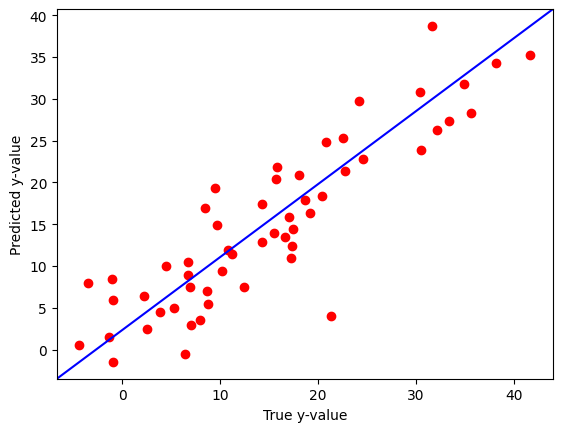

In [ ]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

y_pred=est.predict(x)  # use fitted function (model) to compyte y.

# plot data
fig, ax = plt.subplots()

ax.scatter(y, y_pred, color='red') # plot data real and predicted data points

line = mlines.Line2D([0, 1], [0, 1], color='blue') # add line for perfect fit as guide for the eye
transform = ax.transAxes #
line.set_transform(transform)
ax.add_line(line)

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")

# Using seaborn

A nicer and more automatic way to plot the result is to usae seaborn, we can plot the data and simultanesouly perform a regression using [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)


<Axes: xlabel='True y-value', ylabel='Predicted y-value'>

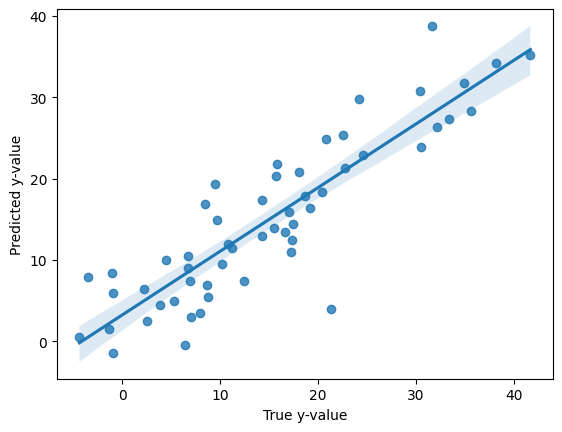

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Predicted y-value':y_pred, 'True y-value':y}) # add real and predicted data to pandas dataframe

sns.regplot(x='True y-value', y='Predicted y-value', data=df)

A common way to illustrate the errors is to use [residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html)

Can you find other ways to plot the data?

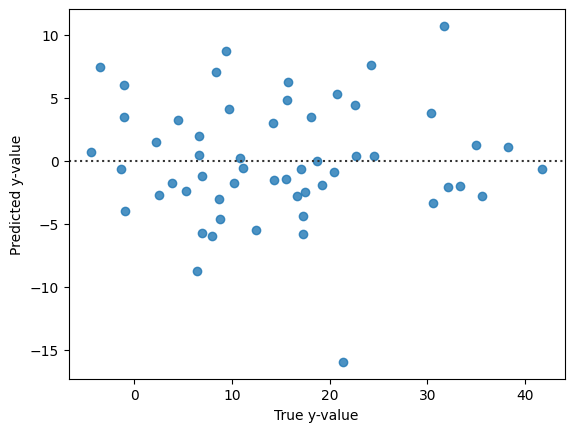

In [ ]:
sns.residplot(x='True y-value', y='Predicted y-value',data=df);


[jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) gives us additional information of the distribution of datapoints:

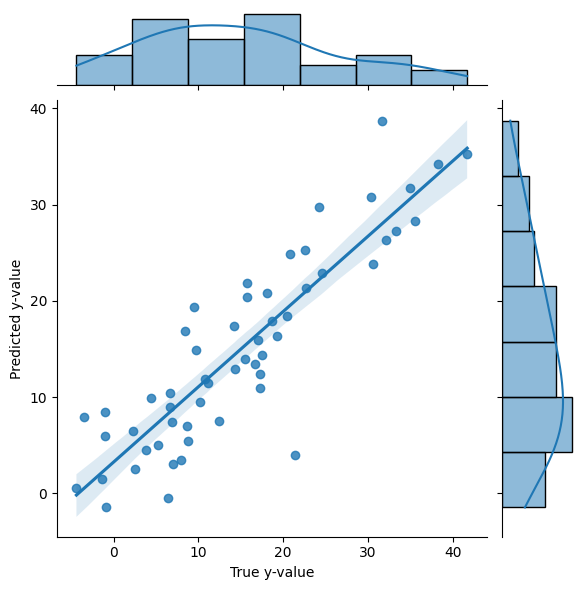

In [ ]:
sns.jointplot(x='True y-value', y='Predicted y-value',data=df, kind='reg')  # kind options: 'kde', 'reg', 'hist', 'hex'


When you have a lot of data, it is sometimes difficult to see... Change kind to improve visibility.

# Extra tasks  
1. Change the number of data points in your data set. How does that affect your model?

2. Change the number of independent variables. Don't forget to modify your response function accordingly. How does that change you model?

